# Loan Data
This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. 

Not sure where to begin? Scroll to the bottom to find challenges!

## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**
 
- 🗺️ **Explore**: Generate a correlation matrix between the numeric columns. What columns are positively and negatively correlated with each other? Does it change if you segment it by the purpose of the loan?
- 📊 **Visualize**: Plot histograms for every numeric column with a color element to segment the bars by `not_fully_paid`.
- 🔎 **Analyze**: Do loans with the same purpose have similar qualities not shared by loans with differing purposes? You can consider only fully paid loans.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data. There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

# Hierarchical Clustering

## Information about the data

In [1]:
import pandas as pd

loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [35]:
loan_data["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [2]:
# Information about the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We can see that the data has 14 columns of numerical types except **purpose** which is **object** and gives the textual description of the purpose of the load. This column will not be included in our analysis.  

## Preprocessing the data 

In [3]:
# Compute percentage of missing values in each column 
percent_missing = round(100*(loan_data.isnull().sum())/len(loan_data), 2)
percent_missing

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

### Drop unwanted columns

In [4]:
# Remove irrelevant columns
cleaned_data = loan_data.drop(['purpose', 'not.fully.paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


In [5]:
cleaned_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


### Analyze outliers

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

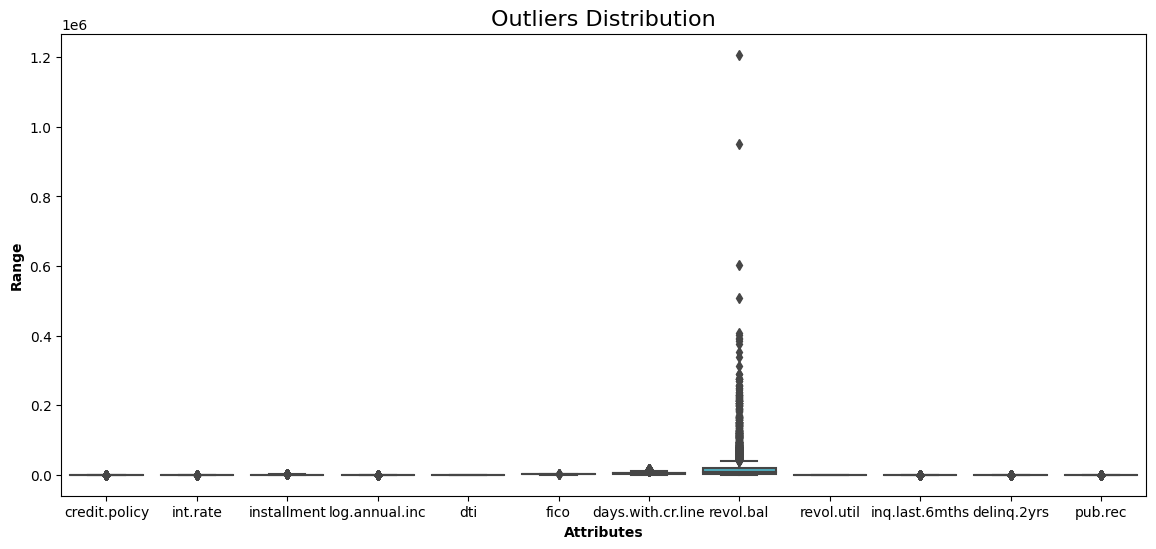

In [7]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    
show_boxplot(cleaned_data)

In [8]:
# Remove outliers
def remove_outliers(data):
    
    df = data.copy()
    
    for col in list(df.columns):
        
        # Compute interquantile range
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR 
        upper_bound = Q3 + 1.5*IQR
        
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    
    return df 

without_outliers = remove_outliers(cleaned_data)

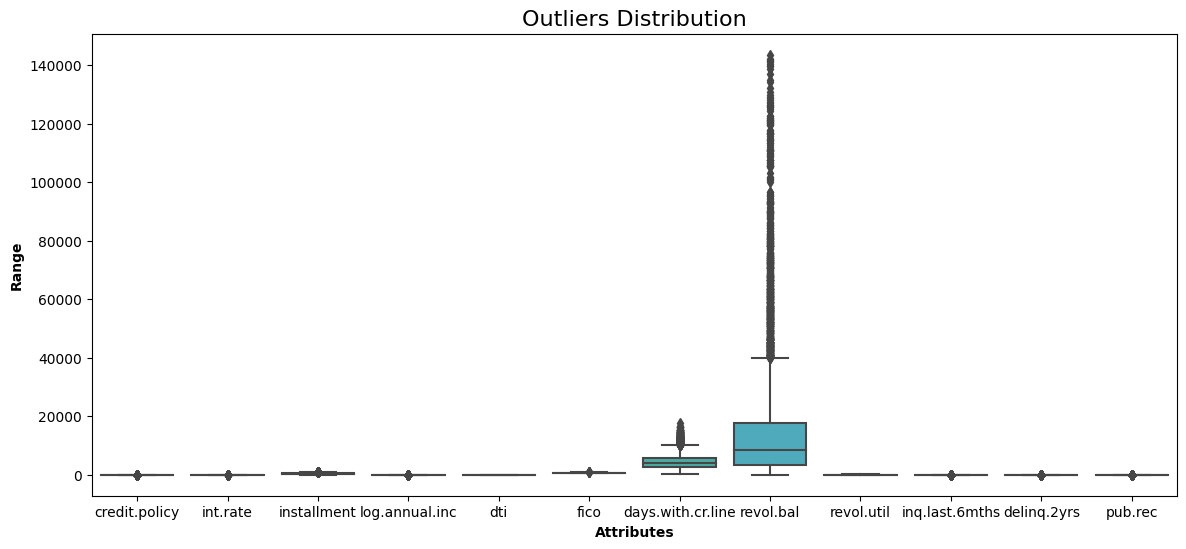

In [9]:
show_boxplot(without_outliers)

### Rescale the data

In [10]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
data_scaler = StandardScaler()

# fit_transform
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9319, 12)

## Applying the hierarchical clustering   
We will use the complete linkage with the Euclidean distance in this section.

In [16]:
# The function for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [11]:
# Perform the clusterings
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

Plot the results of the clustering. 

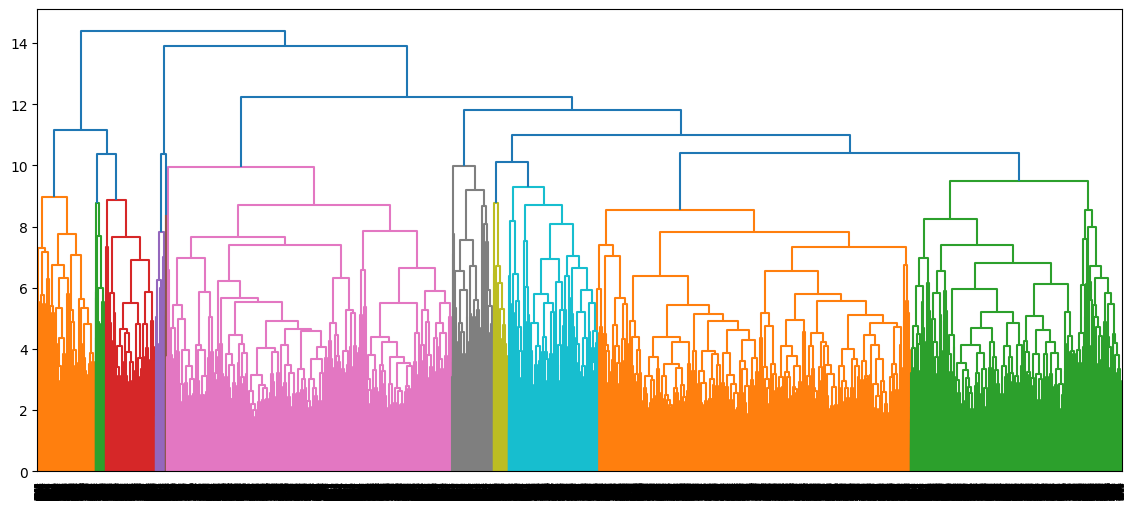

In [12]:
# Complete clustering
dendrogram(complete_clustering)

# Show the dendogram
plt.figure()
plt.title("Dendrogram for complete linkage")
plt.show()

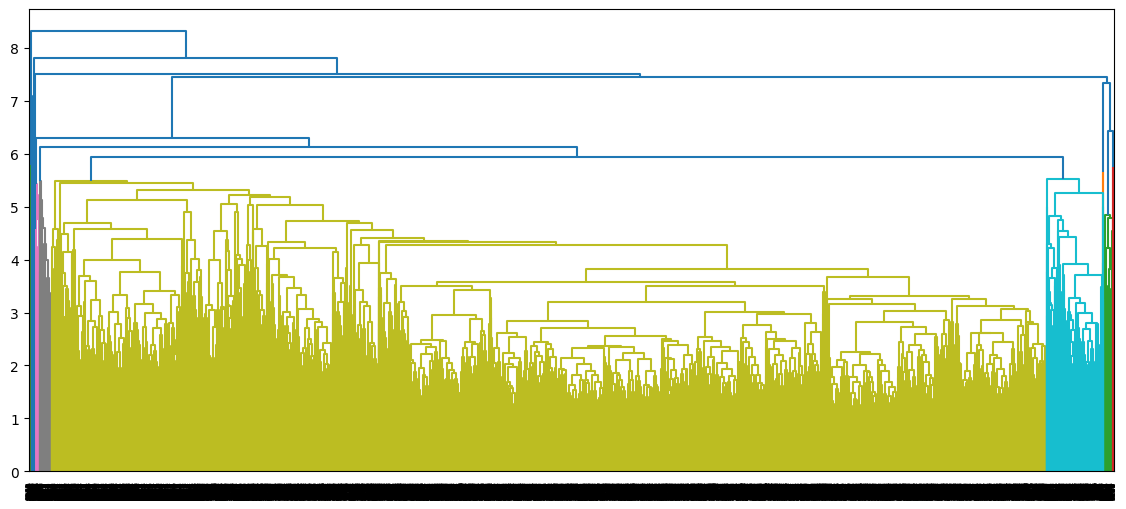

In [13]:
# Average clustering
dendrogram(average_clustering)

# Show the dendogram
plt.show()

In [14]:
import sys
sys.setrecursionlimit(1000000)

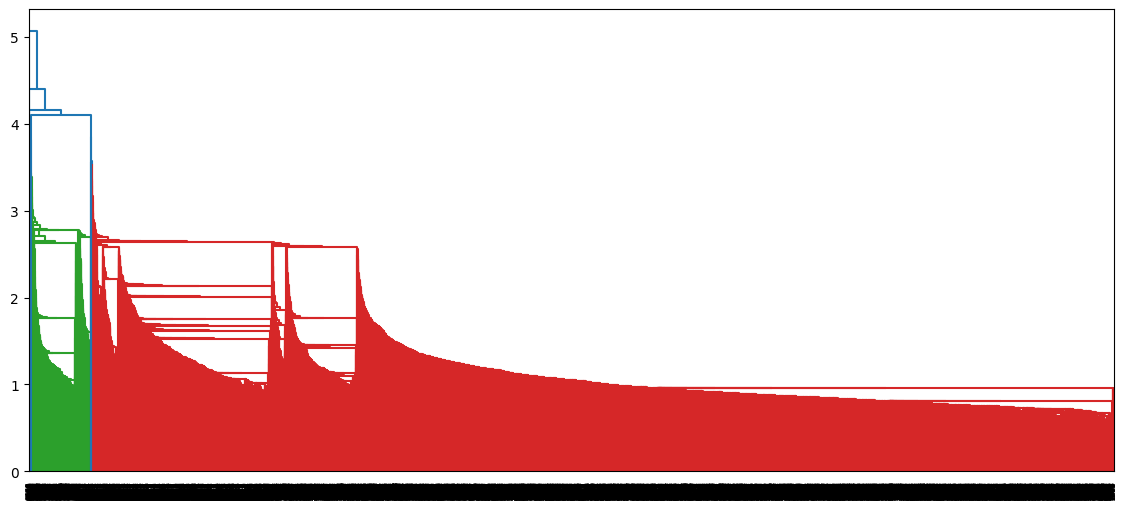

In [15]:
# Single clustering
dendrogram(single_clustering)

# Show the dendogram
plt.show()

## Observation of the Average Linkage clustering

In [38]:
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=without_outliers)

<AxesSubplot:xlabel='Cluster', ylabel='fico'>

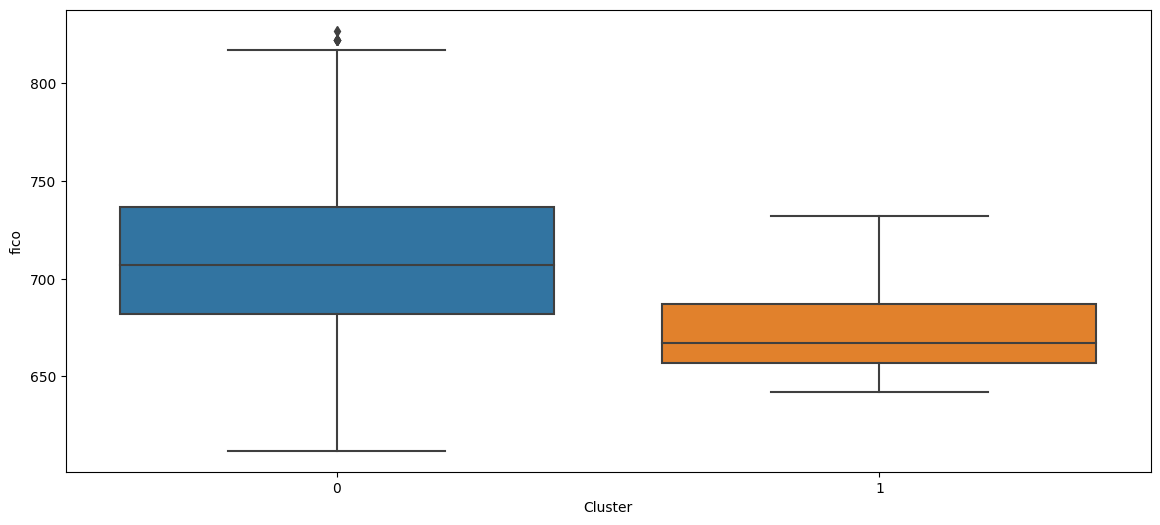